# Lista Prática 1 - Modelos de Classificação para Fashion MNIST

#### Rafael da Silva Barros (rsb7)
#### Gabriel Walisson Alexandre Matias (gwam)

# Imports e Downloads

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, callbacks
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import randint
import time
from tabulate import tabulate, tabulate_formats
import torch
import random

from sklearn.model_selection import train_test_split
from sklearn import svm, ensemble, linear_model, neighbors
from sklearn import gaussian_process, naive_bayes, tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Verificando se a GPU está ativa
print('GPUs available:',len(tf.config.list_physical_devices('GPU')))

GPUs available: 0


# API Local

In [ ]:
# Mapeamento das classes
label_dict = {
    0: 'T-shirt/Top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Semente aleatória do sklearn
RD_SEED = 42

# Predefinindo arrays de resultado
model_list = []
exec_times = []
accuracies = []
worst_classes = []
worst_labels = []
worst_results = []


# Função para printar imagens
def imshow(image):
    img = image*255.0
    imgplot = plt.imshow(img, 'gray')
    plt.show()


# Função de treino dos modelos de machine learning
def train_ml_model(model, name, train_X, train_y):

  # Contagem do tempo de execução do treino
  start_time = time.time()
  model.fit(train_X, train_y)
  end_time = time.time()

  # Calculando tempo de execução
  exec_time = end_time - start_time
  print(f'Tempo de execução do {name} em segundos: {np.round(exec_time,2)}')

  # Salvando os dados do modelo
  model_list.append(name)
  exec_times.append(np.round(exec_time,2))


# Função de avaliação dos modelos de machine learning
def evaluate_ml_model(model, name, test_X, test_y, labels):

  # Fazendo a classificação do conjunto de testes
  pred_y = model.predict(test_X)

  # Medindo a acurácia do modelo
  accuracy = accuracy_score(test_y, pred_y)
  print(f"\n{name} accuracy:",np.round(accuracy,4))

  # Exibindo o relatório de classificação
  print(f"\nClassification Report do {name}")
  print(classification_report(test_y, pred_y))

  # Definindo a matriz de confusão
  cm = confusion_matrix(test_y, pred_y)

  # Calculando a TPR
  TPR = cm.diagonal()/cm.sum(axis=1)
  print(f'\nTPR por classe do {name}:',np.round(TPR,4))

  # Exibindo a matriz de confusão
  print('\nConfusion Matrix')
  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot();

  # Salvando os dados do modelo
  accuracies.append(np.round(accuracy,4))
  worst_classes.append(np.round(TPR.argmin(),4))
  worst_results.append(np.round(TPR.min(),4))


# Função de treino dos modelos de deep learning
def train_dl_model(model, name, train_X, train_y):

  # Treinamento do modelo
  start_time = time.time()
  history = model.fit(train_X, train_y, epochs=10, batch_size=128, validation_split=1/6)
  end_time = time.time()

  # Calcular tempo de execução
  exec_time = end_time - start_time
  print(f'\nTempo de execução do {name} em segundos: {np.round(exec_time,2)}')

  # Plotar gráfico de acurácia durante o treino
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  ax = plt.gca()
  ax.set_ylim([0,1])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'])
  plt.show()

  # Plotar gráfico de custo durante o treino
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  ax = plt.gca()
  ax.set_ylim([0,1])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'])
  plt.show()

  # Salvando os dados do modelo
  model_list.append(name)
  exec_times.append(np.round(exec_time,2))


# Função de avaliação de modelos deep learning
def evaluate_dl_model(model, name, test_X, test_y, labels):

  # Avaliação do modelo no conjunto de teste
  test_loss, test_acc = model.evaluate(test_X, test_y)
  print(f'{name} Test Accuracy: {np.round(test_acc,4)}, {name} Test Loss: {np.round(test_loss,4)}\n')

  # Isolando os resultados para comparação
  test_y = np.argmax(test_y, axis=1)

  # Fazendo a classificação do conjunto de testes
  pred_y = np.argmax(model.predict(test_X), axis=1)

  # Medindo a acurácia do modelo
  accuracy = accuracy_score(test_y, pred_y)

  # Relatório de classificação do modelo
  print(f"\nClassification Report do {name}")
  print(classification_report(test_y, pred_y))

  # Definindo a matriz de confusão
  cm = confusion_matrix(test_y, pred_y)

  # Calculando a TPR
  TPR = cm.diagonal()/cm.sum(axis=1)
  print(f'\nTPR por classe do {name}:',np.round(TPR,4))

  # Exibindo a matriz de confusão
  print('\nConfusion Matrix')
  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot();

  # Adicionando os dados do modelo aos vetores de resultado
  accuracies.append(np.round(accuracy,4))
  worst_classes.append(np.round(TPR.argmin(),4))
  worst_results.append(np.round(TPR.min(),4))


# Função de treino dos modelos de transfer learning
def train_tl_model(model, name, train_dataset):

  # Treinamento do modelo
  start_time = time.time()
  history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)
  end_time = time.time()

  # Calcular tempo de execução
  exec_time = end_time - start_time
  print(f'\nTempo de execução do {name} em segundos: {np.round(exec_time,2)}')

  # Plotar gráfico de acurácia durante o treino
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  ax = plt.gca()
  ax.set_ylim([0,1])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'])
  plt.show()

  # Plotar gráfico de custo durante o treino
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  ax = plt.gca()
  ax.set_ylim([0,1])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'])
  plt.show()

  # Salvando os dados do modelo
  model_list.append(name)
  exec_times.append(np.round(exec_time,2))


# Função de avaliação de modelos transfer learning
def evaluate_tl_model(model, name, test_dataset, labels):

  # Avaliação do modelo no conjunto de teste
  test_loss, test_acc = model.evaluate(test_dataset)
  print(f'{name} Test Accuracy: {np.round(test_acc,4)}, {name} Test Loss: {np.round(test_loss,4)}\n')

  # Isolando os resultados para comparação
  test_y = np.concatenate([y for x, y in test_dataset], axis=0)
  test_y = np.argmax(test_y, axis=1)

  # Fazendo a classificação do conjunto de testes
  pred_y = np.argmax(model.predict(test_dataset), axis=1)

  # Medindo a acurácia do modelo
  accuracy = accuracy_score(test_y, pred_y)

  # Relatório de classificação do modelo
  print(f"\nClassification Report do {name}")
  print(classification_report(test_y, pred_y))

  # Definindo a matriz de confusão
  cm = confusion_matrix(test_y, pred_y)

  # Calculando a TPR
  TPR = cm.diagonal()/cm.sum(axis=1)
  print(f'\nTPR por classe do {name}:',np.round(TPR,4))

  # Exibindo a matriz de confusão
  print('\nConfusion Matrix')
  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot();

  # Adicionando os dados do modelo aos vetores de resultado
  accuracies.append(np.round(accuracy,4))
  worst_classes.append(np.round(TPR.argmin(),4))
  worst_results.append(np.round(TPR.min(),4))

# Tratamento dos Dados

In [ ]:
# Fazendo download do dataset
(train_X, train_y), (test_X, test_y) = datasets.fashion_mnist.load_data()

# Normalizando os dados
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

print('Train set size:',len(train_X),'; shape:',train_X.shape)
print('Test set size:',len(test_X),'; shape:',test_X.shape)

# for i in range(len(train_X)):
#   if label_dict[train_y[i]] == 'Shirt':
#     imshow(train_X[i])

Train set size: 60000 ; shape: (60000, 28, 28)
Test set size: 10000 ; shape: (10000, 28, 28)


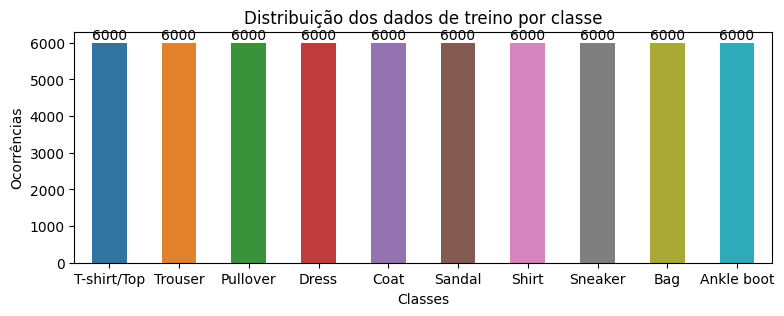

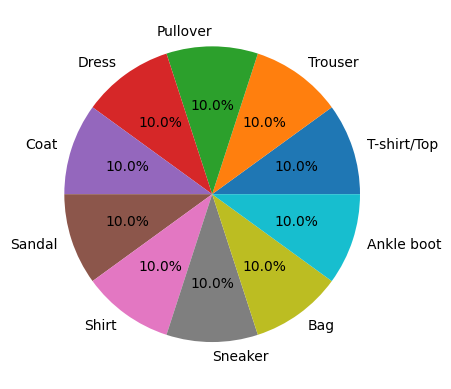

In [ ]:
# Contabilizando ocorrências das clases nos dados de treino
classes, counts = np.unique(train_y, return_counts=True)

# Traduzindo as classes para as labels
labels = []
for i in range(len(classes)):
  labels.append(label_dict[classes[i]])

# Setando os gráficos de distribuição
plt.figure(figsize=(9, 3))
plt.title('Distribuição dos dados de treino por classe')
plt.xlabel('Classes')
plt.ylabel('Ocorrências')
sns.barplot(x=labels, y=counts, width=0.5, hue=labels)
for i in range(len(counts)):
  plt.text(labels[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.figure()
plt.pie(counts, labels=labels, autopct='%0.1f%%')

plt.show()

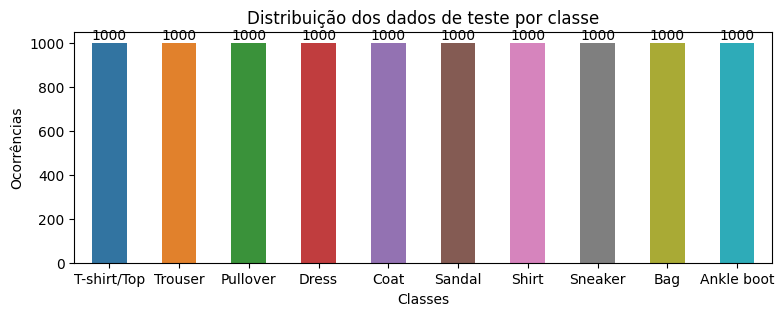

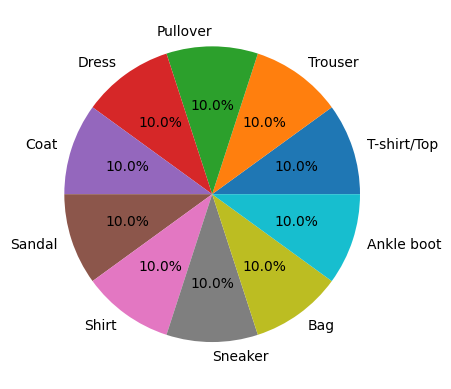

In [ ]:
# Contabilizando ocorrências das clases nos dados de teste
classes, counts = np.unique(test_y, return_counts=True)

# Traduzindo as classes para as labels
labels = []
for i in range(len(classes)):
  labels.append(label_dict[classes[i]])

# Setando os gráficos de distribuição
plt.figure(figsize=(9, 3))
plt.title('Distribuição dos dados de teste por classe')
plt.xlabel('Classes')
plt.ylabel('Ocorrências')
sns.barplot(x=labels, y=counts, width=0.5, hue=labels)
for i in range(len(counts)):
  plt.text(labels[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.figure()
plt.pie(counts, labels=labels, autopct='%0.1f%%')

plt.show()

# Modelo base

In [ ]:
# Linearizando dados
lin_train_X = train_X.reshape(len(train_X), -1)
lin_test_X = test_X.reshape(len(test_X), -1)

# Verificando o formato dos dados
print('Train set size:',len(lin_train_X),'; shape:',lin_train_X.shape)
print('Test set size:',len(lin_test_X),'; shape:',lin_test_X.shape)

Train set size: 60000 ; shape: (60000, 784)
Test set size: 10000 ; shape: (10000, 784)


Tempo de execução do Random Forest em segundos: 161.29

Random Forest accuracy: 0.8783

Classification Report do Random Forest
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.88      0.91      0.89      1000
           4       0.77      0.83      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.58      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


TPR por classe do Random Forest: [0.862 0.964 0.808 0.906 0.827 0.958 0.584 0.953 0.974 0.947]

Confusion Matrix


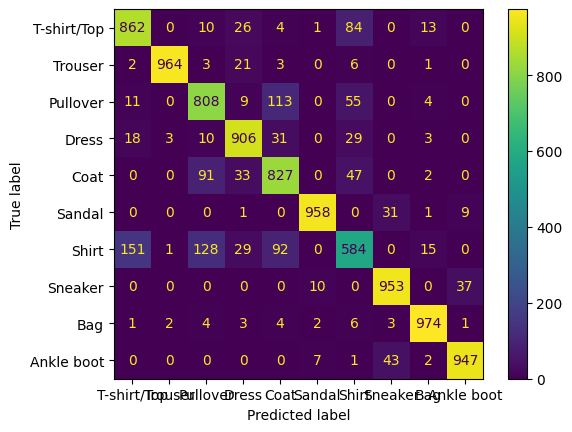

In [ ]:
name = 'Random Forest'

# Criando o classificador
rf_model = ensemble.RandomForestClassifier(n_estimators=150, random_state=RD_SEED)

# Treinando e avaliando o classificador
train_ml_model(rf_model, name, lin_train_X, train_y)
evaluate_ml_model(rf_model, name, lin_test_X, test_y, labels)

Tempo de execução do SVM em segundos: 524.51

SVM accuracy: 0.8463

Classification Report do SVM
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.77      0.75      1000
           3       0.85      0.84      0.85      1000
           4       0.76      0.77      0.77      1000
           5       0.93      0.94      0.93      1000
           6       0.63      0.56      0.59      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.93      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


TPR por classe do SVM: [0.815 0.962 0.769 0.842 0.773 0.936 0.562 0.934 0.925 0.945]

Confusion Matrix


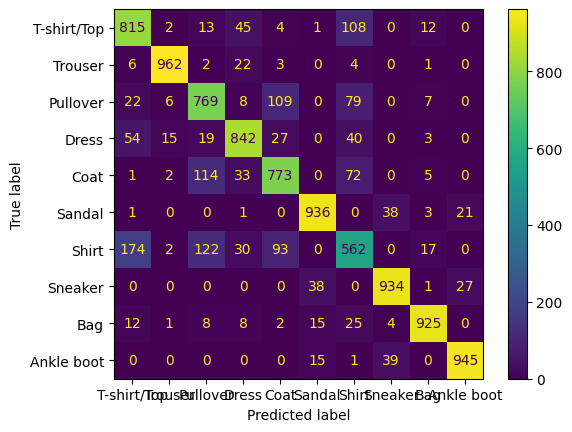

In [ ]:
name = 'SVM'

# Criando o classificador
svm_model = svm.SVC(kernel='linear')

# Treinando e avaliando o classificador
train_ml_model(svm_model, name, lin_train_X, train_y)
evaluate_ml_model(svm_model, name, lin_test_X, test_y, labels)

Tempo de execução do SGD em segundos: 49.47

SGD accuracy: 0.836

Classification Report do SGD
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1000
           1       0.98      0.95      0.97      1000
           2       0.72      0.73      0.72      1000
           3       0.82      0.88      0.85      1000
           4       0.73      0.75      0.74      1000
           5       0.92      0.91      0.92      1000
           6       0.59      0.60      0.60      1000
           7       0.90      0.93      0.91      1000
           8       0.92      0.95      0.94      1000
           9       0.94      0.92      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


TPR por classe do SGD: [0.741 0.951 0.728 0.877 0.751 0.912 0.599 0.927 0.951 0.923]

Confusion Matrix


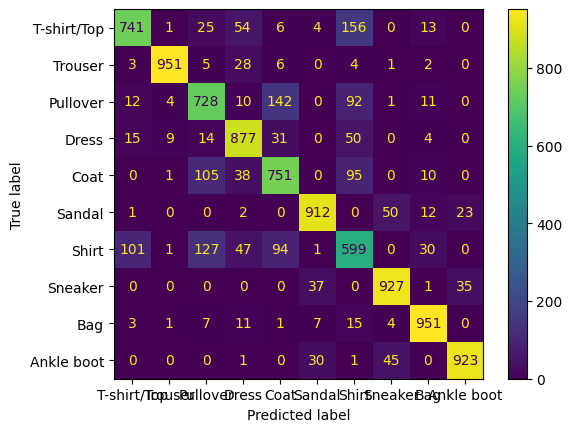

In [ ]:
name = 'SGD'

# Criando o classificador
sgd_model = linear_model.SGDClassifier(loss='log_loss', random_state=RD_SEED)

# Treinando e avaliando o classificador
train_ml_model(sgd_model, name, lin_train_X, train_y)
evaluate_ml_model(sgd_model, name, lin_test_X, test_y, labels)

Tempo de execução do KNN em segundos: 0.04

KNN accuracy: 0.8554

Classification Report do KNN
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000


TPR por classe do KNN: [0.855 0.968 0.819 0.86  0.773 0.822 0.575 0.961 0.953 0.968]

Confusion Matrix


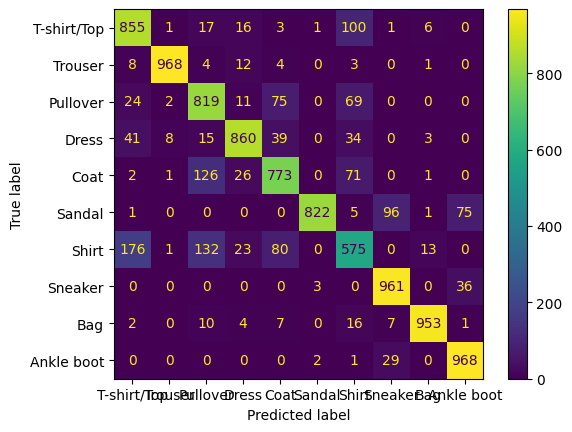

In [ ]:
name = 'KNN'

# Criando o classificador
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)

# Treinando e avaliando o classificador
train_ml_model(knn_model, name, lin_train_X, train_y)
evaluate_ml_model(knn_model, name, lin_test_X, test_y, labels)

Tempo de execução do Naive Bayes em segundos: 0.93

Naive Bayes accuracy: 0.5856

Classification Report do Naive Bayes
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           9       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000


TPR por classe do Naive Bayes: [0.586 0.939 0.324 0.545 0.779 0.278 0.04  0.988 0.71  0.667]

Confusion Matrix


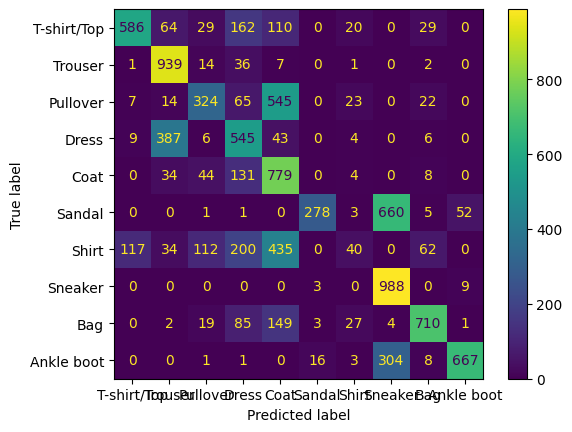

In [ ]:
name = 'Naive Bayes'

# Criando o classificador
gnb_model = naive_bayes.GaussianNB()

# Treinando e avaliando o classificador
train_ml_model(gnb_model, name, lin_train_X, train_y)
evaluate_ml_model(gnb_model, name, lin_test_X, test_y, labels)

Tempo de execução do Decision Tree em segundos: 43.25

Decision Tree accuracy: 0.801

Classification Report do Decision Tree
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.95      0.94      0.95      1000
           2       0.68      0.69      0.68      1000
           3       0.82      0.79      0.80      1000
           4       0.68      0.67      0.67      1000
           5       0.91      0.89      0.90      1000
           6       0.54      0.56      0.55      1000
           7       0.86      0.89      0.88      1000
           8       0.93      0.93      0.93      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000


TPR por classe do Decision Tree: [0.739 0.943 0.688 0.79  0.667 0.893 0.561 0.894 0.93  0.905]

Confusion Matrix


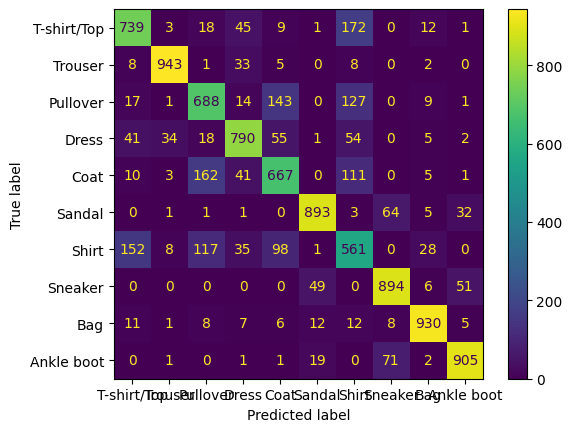

In [ ]:
name = 'Decision Tree'

# Criando o classificador
dt_model = tree.DecisionTreeClassifier(criterion='log_loss', max_depth=500)

# Treinando e avaliando o classificador
train_ml_model(dt_model, name, lin_train_X, train_y)
evaluate_ml_model(dt_model, name, lin_test_X, test_y, labels)

# MLP

In [ ]:
# Carregamento e pré-processamento dos dados
(train_X, train_y), (test_X, test_y) = datasets.fashion_mnist.load_data()

# Redimensionamento e normalização dos dados
train_X = train_X.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_X = test_X.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Conversão de rótulos em categorias
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

print('Train set size:',len(train_X),'; shape:',train_X.shape)
print('Test set size:',len(test_X),'; shape:',test_X.shape)

Train set size: 60000 ; shape: (60000, 28, 28, 1)
Test set size: 10000 ; shape: (10000, 28, 28, 1)


Epoch 1/10
391/391 [==============================] - 9s 19ms/step - loss: 0.6111 - accuracy: 0.7787 - val_loss: 0.4553 - val_accuracy: 0.8246
Epoch 2/10
391/391 [==============================] - 8s 21ms/step - loss: 0.4197 - accuracy: 0.8488 - val_loss: 0.3882 - val_accuracy: 0.8640
Epoch 3/10
391/391 [==============================] - 7s 17ms/step - loss: 0.3806 - accuracy: 0.8615 - val_loss: 0.3920 - val_accuracy: 0.8558
Epoch 4/10
391/391 [==============================] - 8s 21ms/step - loss: 0.3541 - accuracy: 0.8703 - val_loss: 0.3499 - val_accuracy: 0.8754
Epoch 5/10
391/391 [==============================] - 7s 17ms/step - loss: 0.3430 - accuracy: 0.8756 - val_loss: 0.3467 - val_accuracy: 0.8732
Epoch 6/10
391/391 [==============================] - 8s 20ms/step - loss: 0.3247 - accuracy: 0.8814 - val_loss: 0.3248 - val_accuracy: 0.8816
Epoch 7/10
391/391 [==============================] - 7s 17ms/step - loss: 0.3150 - accuracy: 0.8859 - val_loss: 0.3266 - val_accuracy: 0.8811

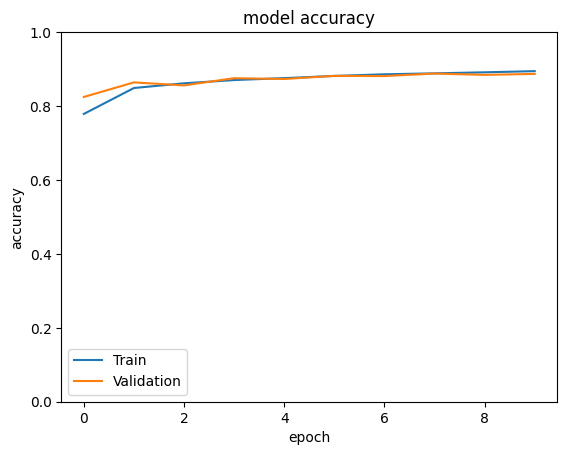

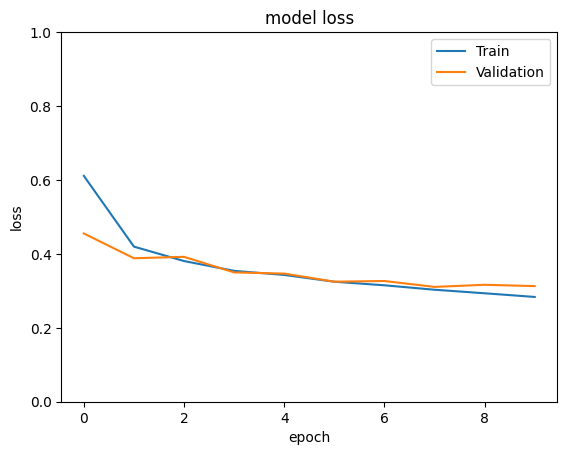

313/313 [==============================] - 2s 5ms/step - loss: 0.3350 - accuracy: 0.8798
MLP Test Accuracy: 0.8798, MLP Test Loss: 0.335

313/313 [==============================] - 1s 3ms/step

Classification Report do MLP
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.81      0.75      0.78      1000
           3       0.89      0.88      0.88      1000
           4       0.74      0.85      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.75      0.62      0.68      1000
           7       0.92      0.97      0.95      1000
           8       0.96      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


TPR por classe do

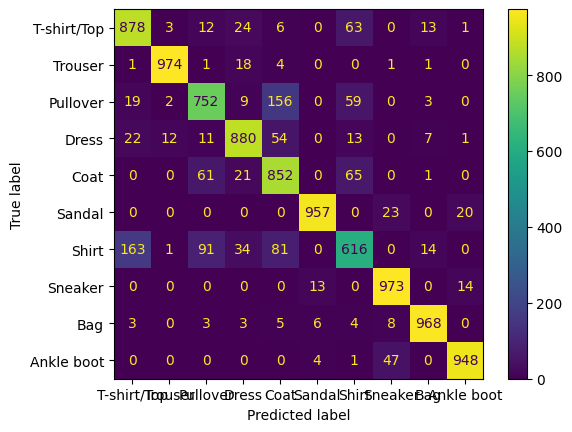

In [ ]:
name = 'MLP'

# Criação do modelo MLP
mlp = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilação do modelo com um otimizador que tem uma taxa de aprendizado ajustada
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
mlp.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para parar o treinamento quando não houver melhora
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Treinamento do modelo
train_dl_model(mlp, name, train_X, train_y)
evaluate_dl_model(mlp, name, test_X, test_y, labels)


# Rede Convolucional

In [ ]:
# Carregamento e pré-processamento dos dados
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.fashion_mnist.load_data()

train_X = train_X.reshape(train_X.shape[0], 28, 28, 1) / 255.0
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1) / 255.0

train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

print('Train set size:',len(train_X),'; shape:',train_X.shape)
print('Test set size:',len(test_X),'; shape:',test_X.shape)

Train set size: 60000 ; shape: (60000, 28, 28, 1)
Test set size: 10000 ; shape: (10000, 28, 28, 1)


Epoch 1/10
391/391 [==============================] - 65s 163ms/step - loss: 0.4873 - accuracy: 0.8270 - val_loss: 1.4039 - val_accuracy: 0.5881
Epoch 2/10
391/391 [==============================] - 60s 154ms/step - loss: 0.3226 - accuracy: 0.8814 - val_loss: 0.2975 - val_accuracy: 0.8893
Epoch 3/10
391/391 [==============================] - 60s 153ms/step - loss: 0.2813 - accuracy: 0.8947 - val_loss: 0.2933 - val_accuracy: 0.8949
Epoch 4/10
391/391 [==============================] - 63s 162ms/step - loss: 0.2541 - accuracy: 0.9068 - val_loss: 0.2607 - val_accuracy: 0.9048
Epoch 5/10
391/391 [==============================] - 60s 153ms/step - loss: 0.2286 - accuracy: 0.9140 - val_loss: 0.2798 - val_accuracy: 0.8993
Epoch 6/10
391/391 [==============================] - 60s 153ms/step - loss: 0.2146 - accuracy: 0.9184 - val_loss: 0.2493 - val_accuracy: 0.9108
Epoch 7/10
391/391 [==============================] - 63s 161ms/step - loss: 0.1987 - accuracy: 0.9253 - val_loss: 0.2647 - val_ac

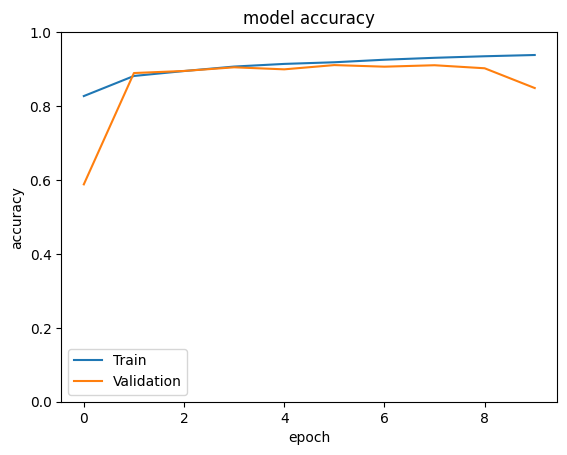

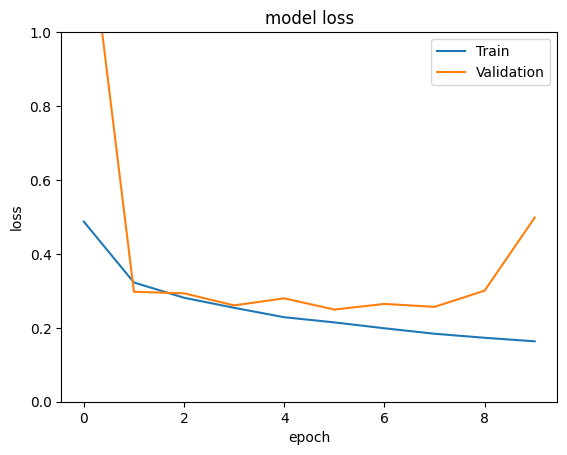

313/313 [==============================] - 3s 11ms/step - loss: 0.5141 - accuracy: 0.8497
LeNet Test Accuracy: 0.8497, LeNet Test Loss: 0.5141

313/313 [==============================] - 3s 11ms/step

Classification Report do LeNet
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1000
           1       1.00      0.97      0.98      1000
           2       0.56      0.93      0.70      1000
           3       0.88      0.93      0.90      1000
           4       0.90      0.34      0.49      1000
           5       0.98      0.96      0.97      1000
           6       0.80      0.54      0.65      1000
           7       0.94      0.97      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.85     10000
   macro avg       0.87      0.85      0.84     10000
weighted avg       0.87      0.85      0.84     10000


TPR por 

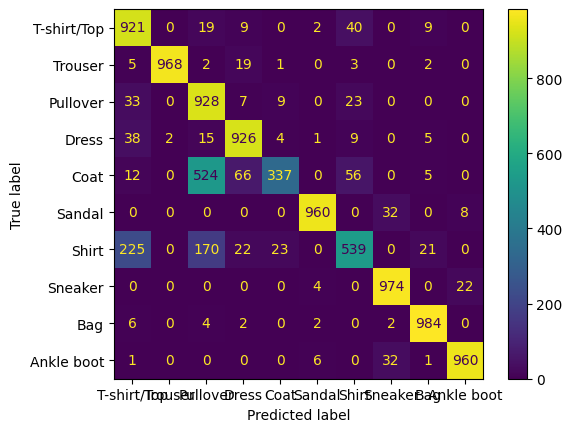

In [ ]:
name = 'LeNet'

# Construção do modelo de CNN
lenet = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilação do modelo
lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para salvar o melhor modelo durante o treinamento
checkpoint = callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)

# Treinando e avaliando o modelo
train_dl_model(lenet, name, train_X, train_y)
evaluate_dl_model(lenet, name, test_X, test_y, labels)

# Rede Convolucional consolidada

In [ ]:
# Carregando o dataset Fashion MNIST
(train_X, train_y), (test_X, test_y) = datasets.fashion_mnist.load_data()

# Limitando o número de amostras para não estourar a RAM
MAX_SAMPLES = 1500
train_idx = random.sample(range(len(train_X)), MAX_SAMPLES)
test_idx = random.sample(range(len(test_X)), MAX_SAMPLES)

# Amostrando os conjuntos de dados
train_X = train_X[train_idx]
train_y = train_y[train_idx]
test_X = test_X[test_idx]
test_y = test_y[test_idx]

# Adicionando uma dimensão de canal
train_X = np.expand_dims(train_X, -1).astype('float32')
test_X = np.expand_dims(test_X, -1).astype('float32')

# Convertendo imagens de grayscale para RGB
train_X = np.repeat(train_X, 3, axis=-1)
test_X = np.repeat(test_X, 3, axis=-1)

print('Train set size:',len(train_X),'; shape:',train_X.shape)
print('Test set size:',len(test_X),'; shape:',test_X.shape)

# Categorizando as classes
train_y = tf.one_hot(train_y, 10)
test_y = tf.one_hot(test_y, 10)

# Formatando os dados para o formato de entrada das redes
train_X = np.array([tf.image.resize(img, (224,224)) for img in train_X])
test_X = np.array([tf.image.resize(img, (224,224)) for img in test_X])

print('Train set size:',len(train_X),'; shape:',train_X.shape)
print('Test set size:',len(test_X),'; shape:',test_X.shape)

Train set size: 1500 ; shape: (1500, 28, 28, 3)
Test set size: 1500 ; shape: (1500, 28, 28, 3)
Train set size: 1500 ; shape: (1500, 224, 224, 3)
Test set size: 1500 ; shape: (1500, 224, 224, 3)


Epoch 1/10
10/10 [==============================] - 349s 35s/step - loss: 1.6025 - accuracy: 0.5064 - val_loss: 0.7339 - val_accuracy: 0.7160
Epoch 2/10
10/10 [==============================] - 345s 35s/step - loss: 0.6590 - accuracy: 0.7672 - val_loss: 0.5846 - val_accuracy: 0.7880
Epoch 3/10
10/10 [==============================] - 346s 35s/step - loss: 0.5088 - accuracy: 0.8064 - val_loss: 0.5272 - val_accuracy: 0.7960
Epoch 4/10
10/10 [==============================] - 346s 35s/step - loss: 0.4051 - accuracy: 0.8536 - val_loss: 0.4846 - val_accuracy: 0.8120
Epoch 5/10
10/10 [==============================] - 346s 35s/step - loss: 0.3556 - accuracy: 0.8704 - val_loss: 0.4824 - val_accuracy: 0.8320
Epoch 6/10
10/10 [==============================] - 316s 32s/step - loss: 0.3257 - accuracy: 0.8816 - val_loss: 0.4927 - val_accuracy: 0.8200
Epoch 7/10
10/10 [==============================] - 345s 35s/step - loss: 0.2824 - accuracy: 0.8936 - val_loss: 0.4471 - val_accuracy: 0.8280
Epoch 

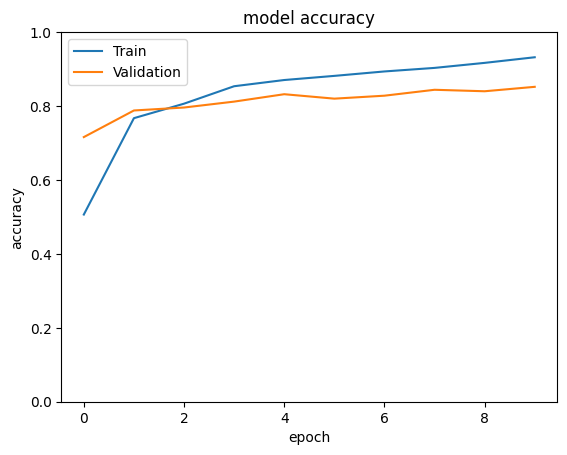

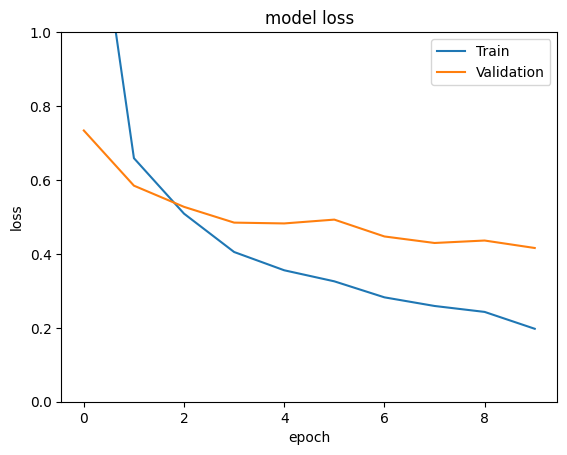

47/47 [==============================] - 291s 6s/step - loss: 0.4588 - accuracy: 0.8400
TL ResNet50 Test Accuracy: 0.84, TL ResNet50 Test Loss: 0.4588

47/47 [==============================] - 291s 6s/step

Classification Report do TL ResNet50
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       147
           1       0.95      0.98      0.96       161
           2       0.85      0.74      0.79       137
           3       0.90      0.77      0.83       147
           4       0.63      0.76      0.69       150
           5       0.93      0.91      0.92       141
           6       0.64      0.54      0.59       162
           7       0.89      0.96      0.93       150
           8       0.95      0.95      0.95       163
           9       0.96      0.91      0.93       142

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      150

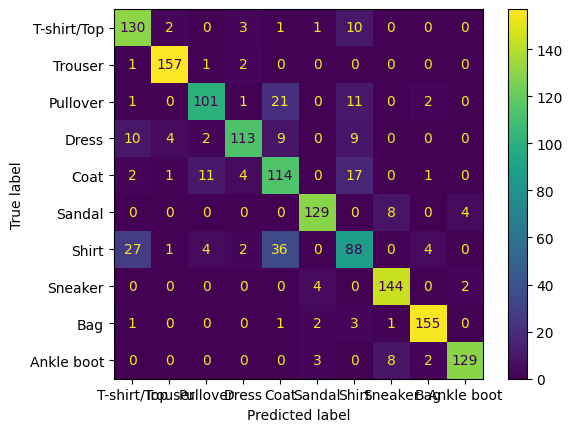

In [ ]:
name = 'TL ResNet50'

# Configurando o modelo
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelar a base do modelo

# Construção do novo modelo para o novo conjunto de classes
modelResNet50 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo com as configurações de otimização e perda
modelResNet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar e avaliar o modelo
train_dl_model(modelResNet50, name, train_X, train_y)
evaluate_dl_model(modelResNet50, name, test_X, test_y, labels)

# Comparação

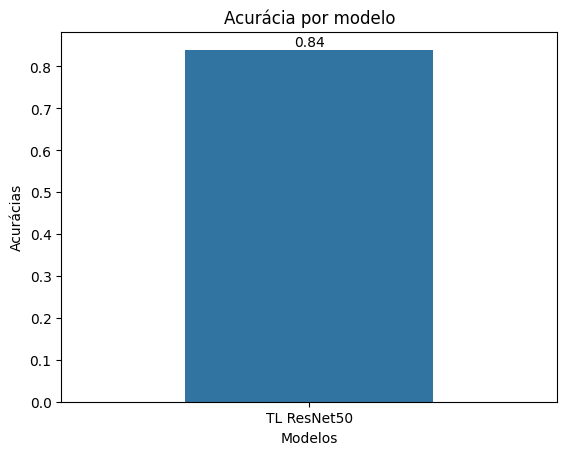

In [ ]:
# Comparando acurácias
plt.figure()
plt.title('Acurácia por modelo')
plt.xlabel('Modelos')
plt.ylabel('Acurácias')
sns.barplot(x=model_list,y=accuracies,width=0.5, hue=model_list)
for i in range(len(model_list)):
  plt.text(model_list[i],accuracies[i],str(np.round(accuracies[i],4)),ha='center',va='bottom')
plt.show()

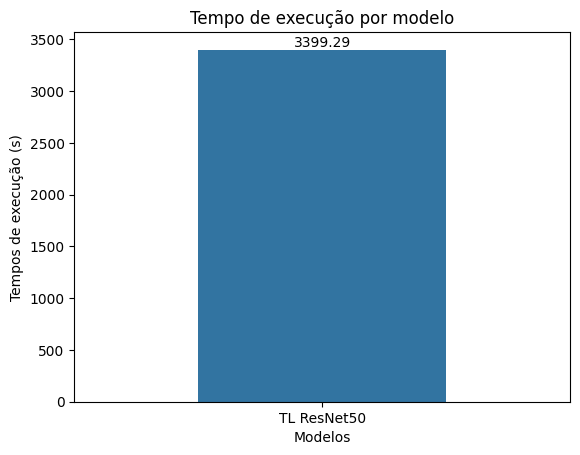

In [ ]:
#Comparando tempos de execução
plt.figure()
plt.title('Tempo de execução por modelo')
plt.xlabel('Modelos')
plt.ylabel('Tempos de execução (s)')
sns.barplot(x=model_list,y=exec_times,width=0.5, hue=model_list)
for i in range(len(model_list)):
  plt.text(model_list[i],exec_times[i],str(np.round(exec_times[i], 2)),ha='center',va='bottom')
plt.show()

In [ ]:
# Organizando os dados
for i in range(len(worst_classes)):
  worst_labels.append(label_dict[worst_classes[i]])

data = {
    'models': model_list,
    'piores_classes': worst_labels,
    'piores_resultados': np.round(worst_results, 3)
}

# Comparando piores classes e resultados
print('Piores resultados por modelo')
print(tabulate(data, headers='keys', tablefmt='outline'))

Piores resultados por modelo
+-------------+------------------+---------------------+
| models      | piores_classes   |   piores_resultados |
+=============+==================+=====================+
| TL ResNet50 | Shirt            |               0.543 |
+-------------+------------------+---------------------+
